In [50]:
# import the pandas library
import pandas as pd 

# show plots in the notebook
%matplotlib inline 

# this limit the data that will be shown, so I won't be seeing a huge dataset, but the first and last few
from pandas import set_option
set_option('display.max_rows',6)

In [51]:
# load dataset
filename = 't198201_elev.csv'

temp82_01 = pd.read_csv(filename, sep=',')
temp82_01

,VALUE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,1,5027766,0.722193,-99.90,20.88,120.78,11.12530,25.130000,55935200.00
1,2,1515456,0.217682,-99.90,20.88,120.78,14.51680,14.574300,21999600.00
2,3,1099428,0.157923,-99.90,20.88,120.78,14.66240,11.398700,16120200.00
...,...,...,...,...,...,...,...,...,...
76,77,236,0.000034,0.51,3.15,2.64,1.46449,0.995280,345.62
77,78,59,0.000008,0.51,2.25,1.74,1.12932,0.833103,66.63
78,79,15,0.000002,0.51,0.51,0.00,0.51000,0.000000,7.65


I choose to use the pandas library because my dataset is relatively large. This single dataset is small, but for the final research dataset will be huge. This dataset is only containing the information for temperature in January 1982. I have 31 years of data (temperature, vegetation, and rainfall from 1982 to 2012), therefore I choose to use Pandas in order to work with large dataset. 
For this dataset (January 1982), I load the data with pandas and I used the seperator (sep=",") becuase the dataset is comma separated (not space or tab). 

In [46]:
print(temp82_01['MEAN'].mean())

7.768136835443035


Here I use take the average of the January 1982 temperature in all elevation. By taking the average of the entire temprature data at January 1982, I can potentially compare the temperature data for all January from 1982 to 2012 and look at an increasing trend or decreasing trend for temperature. Here, it shows me that the average temperature in January 1982 is around 7.77 degrees Celsisu in all elevation.

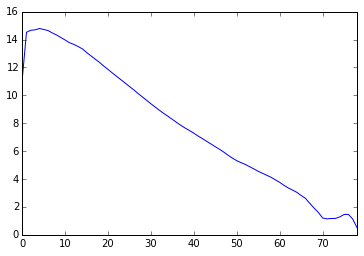

In [30]:
temp82_01['MEAN'].plot()

Here I use the plot command to see the temperature trend in January 1982. The x-axis represent elevation (1 = 0-50m, 2=50-100m, 3=100-150m, and so on). Using the plot command we can see how temperature changes in different elevation. It shows that temperature decreases with higher elevation, which makes sense. 

In [52]:
temp82_01['Elevation (m)']=temp82_01['VALUE']*50

The dataset does not have a elevation column. Instead, the dataset uses VALUE as elevation (1 = 0-50m, 2=50-100m, 3=100-150m, and so on). This is not very clear, so I decided to add a new column call elevation. I believe this would be easier to understand the dataset (more straightforward, less confusion). Therefore, I created a column called "Eelvation (m)". Then I multiply the VALUE by 50 to get the elevation (50,100,150,200 and so on).

In [53]:
temp82_01

,VALUE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM,Elevation (m)
0,1,5027766,0.722193,-99.90,20.88,120.78,11.12530,25.130000,55935200.00,50
1,2,1515456,0.217682,-99.90,20.88,120.78,14.51680,14.574300,21999600.00,100
2,3,1099428,0.157923,-99.90,20.88,120.78,14.66240,11.398700,16120200.00,150
...,...,...,...,...,...,...,...,...,...,...
76,77,236,0.000034,0.51,3.15,2.64,1.46449,0.995280,345.62,3850
77,78,59,0.000008,0.51,2.25,1.74,1.12932,0.833103,66.63,3900
78,79,15,0.000002,0.51,0.51,0.00,0.51000,0.000000,7.65,3950
